In [139]:
%pylab
import pandas as pd
import scipy.constants as ct

%matplotlib inline

# to display all rcParams options: enter 'matplotlib.rcParams'
matplotlib.rcParams['text.usetex']= True
matplotlib.rcParams['font.size'] = 16

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [132]:
# DSMC tables
tabla49 = pd.read_table('DSMC/temp_av_49.dat', index_col=0)
Ts49 = np.genfromtxt('DSMC/Ts49.dat')[2]
tabla50 = pd.read_table('DSMC/temp_av_50.dat', index_col=0)
Ts50 = np.genfromtxt('DSMC/Ts50.dat')[2]
tabla51 = pd.read_table('DSMC/temp_av_51.dat', index_col=0)
Ts51 = np.genfromtxt('DSMC/Ts51.dat')[2]

# MD tables
# cooling series
tabla49_MD = pd.read_table('MD/cool.a2-035.energy.dat', sep='\s+', header=None, names=['ncol', 'T'])
tabla50_MD = pd.read_table('MD/cool.a200.energy.dat', sep='\s+', header=None, names=['ncol', 'T'])
tabla51_MD = pd.read_table('MD/cool.a2050.energy.dat', sep='\s+', header=None, names=['ncol', 'T'])
# heating series
tabla52_MD = pd.read_table('MD/heat.a2-035.energy.dat', sep='\s+', header=None, names=['ncol', 'T'])
tabla53_MD = pd.read_table('MD/heat.a200.energy.dat', sep='\s+', header=None, names=['ncol', 'T'])
tabla54_MD = pd.read_table('MD/heat.a2050.energy.dat', sep='\s+', header=None, names=['ncol', 'T'])


In [32]:
tabla49.head()

,t,ncol,T,a2,ux,uy,uz
0,0.0,0.000000,0.921154,-0.349987,4.796836e-18,1.990137e-18,1.097183e-18
1,0.2,0.110421,0.921952,-0.297971,-4.872118e-05,2.833796e-05,7.260233e-05
2,0.4,0.220744,0.922245,-0.252284,-6.403634e-05,5.727222e-05,6.476580e-05
3,0.6,0.330790,0.922199,-0.212430,-6.003936e-05,4.951347e-05,1.631387e-04
4,0.8,0.440741,0.921684,-0.177980,-8.207417e-05,3.366610e-05,1.486283e-04


In [133]:
tabla54_MD.head()

,ncol,T
0,0.000000,0.970000
1,0.104154,0.970706
2,0.422484,0.968742
3,0.751112,0.970522
4,1.049753,0.973401


In [155]:
tabla49_MD.head()


,ncol,T
0,0.000000,1.030000
1,0.091433,1.033081
2,0.388848,1.032583
3,0.676839,1.030900
4,0.968316,1.027805


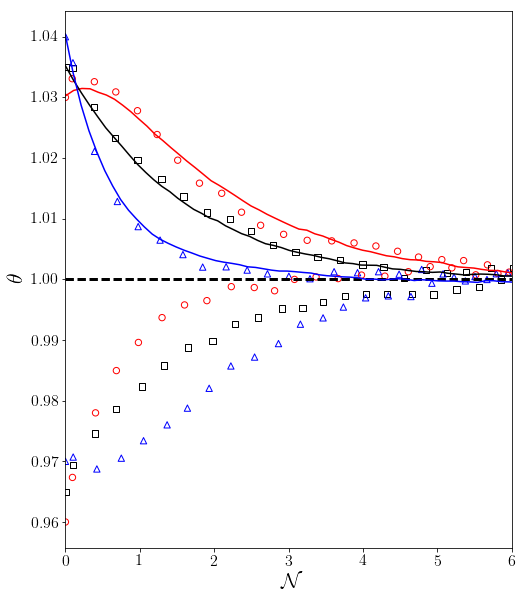

In [161]:
plt.figure(figsize=(8 , 2*8/ct.golden_ratio ))
plt.xlim(0, 6)
plt.xlabel(r'$\mathcal{N}$', fontsize=22)
plt.ylabel(r'$\theta$', fontsize=22)

# PLOT DSMC DATA
plt.plot(tabla49['ncol'], tabla49['T']/Ts49, color='r')
plt.plot(tabla50['ncol'], tabla50['T']/Ts50, color='k')
plt.plot(tabla51['ncol'], tabla51['T']/Ts51, color='b')

# PLOT MD DATA
symbol_size = 40

# plot cooling MD series
plt.scatter(tabla49_MD['ncol'], tabla49_MD['T'], 
            edgecolors='r', marker='o', facecolors='none', s= symbol_size)
plt.scatter(tabla50_MD['ncol'], tabla50_MD['T'], 
            edgecolors='k', marker='s', facecolors='none', s= symbol_size)
plt.scatter(tabla51_MD['ncol'], tabla51_MD['T'], 
            edgecolors='b', marker='^', facecolors='none', s= symbol_size)

# plot heating MD series
plt.scatter(tabla52_MD['ncol'], tabla52_MD['T'], 
            edgecolors='r', marker='o', facecolors='none', s= symbol_size)
plt.scatter(tabla53_MD['ncol'], tabla53_MD['T'], 
            edgecolors='k', marker='s', facecolors='none', s= symbol_size)
plt.scatter(tabla54_MD['ncol'], tabla54_MD['T'], 
            edgecolors='b', marker='^', facecolors='none', s= symbol_size)

plt.hlines(y=1, xmin=0.0, xmax=12, color='k',linestyles='--', linewidth=3)

plt.savefig('fig_preliminar.pdf', bbox_inches='tight')